In [ ]:
# The Fashion training set consists of 70,000 images, divided as 60,000 training samples and 10,000 testing samples.
# Dataset consists of 28X28 grayscale image, associated with a label from 10 classes.
# 10 classes:
# 0 -> T-shirt/top 
# 1 -> Trouser 
# 2 -> Pullover 
# 3 -> Dress 
# 4 -> Coat 
# 5 -> Sandal 
# 6 -> Shirt 
# 7 -> Sneaker 
# 8 -> Bag 
# 9 -> Ankle boot

# 01 DATA IMPORT

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [34]:
train_df_fashion = pd.read_csv('Fashion-MNIST-Datasets/fashion-mnist_train.csv' ,sep=',')
test_df_fashion = pd.read_csv('Fashion-MNIST-Datasets/fashion-mnist_test.csv' ,sep=',')

# 02 DATASET VISUALIZATION

In [35]:
train_df_fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_df_fashion.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test_df_fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
train_df_fashion.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
test_df_fashion.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [40]:
train_df_fashion.shape

(60000, 785)

In [41]:
# Training and testing arrays
training = np.array(train_df_fashion, dtype = 'float32')
testing = np.array(test_df_fashion, dtype = 'float32')

In [42]:
training.shape

(60000, 785)

In [43]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
# The Fashion training set consists of 70,000 images, divided as 60,000 training samples and 10,000 testing samples.
# Dataset consists of 28X28 grayscale image, associated with a label from 10 classes.
# 10 classes:
# 0 -> T-shirt/top 
# 1 -> Trouser 
# 2 -> Pullover 
# 3 -> Dress 
# 4 -> Coat 
# 5 -> Sandal 
# 6 -> Shirt 
# 7 -> Sneaker 
# 8 -> Bag 
# 9 -> Ankle boot

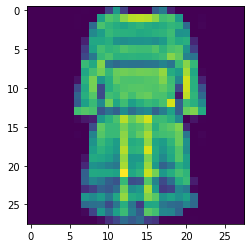

In [45]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))

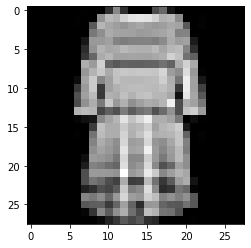

In [46]:
plt.imshow(training[i,1:].reshape(28,28),cmap = 'gray')

In [47]:
label = training[i,0]
label

3.0

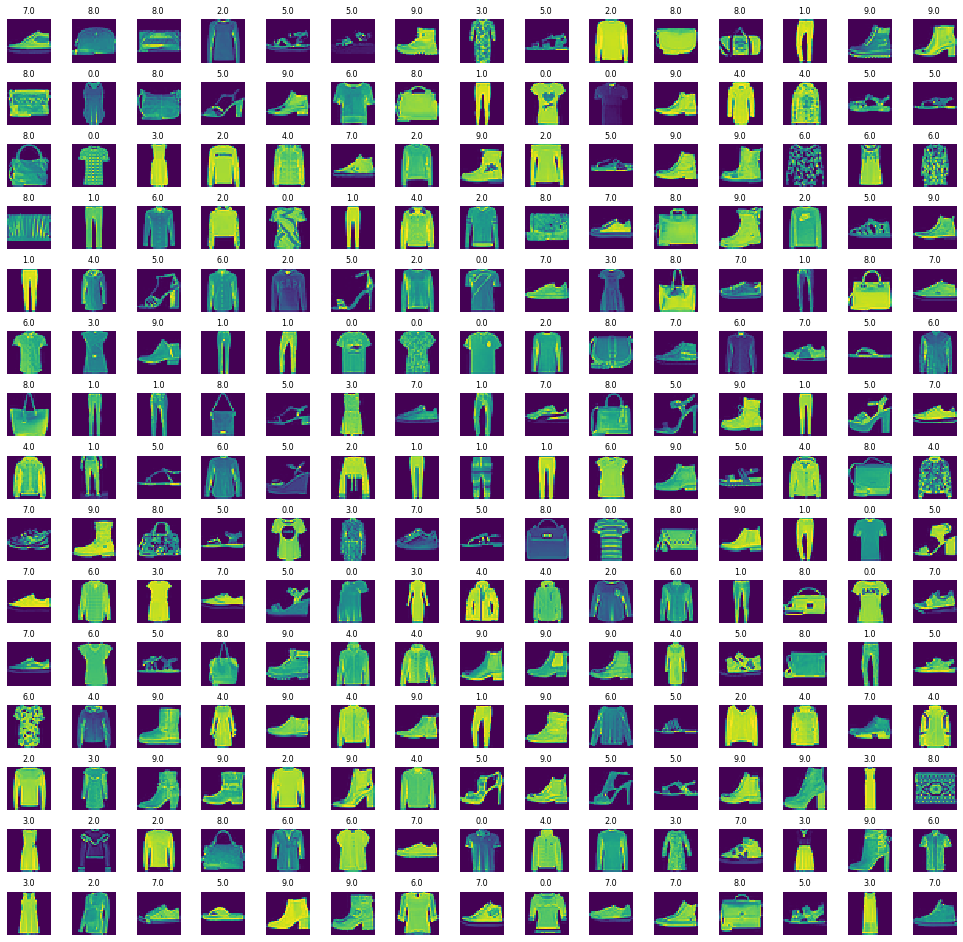

In [48]:
#To view more images in grid
grid_length = 15
grid_width = 15
fig,axes = plt.subplots(grid_length,grid_width,figsize = (17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(grid_length * grid_width):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# 03 Training the Model

In [49]:
# Prepare training and testing dataset
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state = 12345)

In [51]:
X_train.shape

(48000, 784)

In [52]:
y_train.shape

(48000,)

In [53]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [54]:
X_train.shape

(48000, 28, 28, 1)

In [55]:
X_test.shape

(10000, 28, 28, 1)

In [56]:
X_validate.shape

(12000, 28, 28, 1)

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [58]:
cnn_model = Sequential()

# 32 fliters 
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
# first then 64
cnn_model.add(Conv2D(64,3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\FAnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
C:\Users\FAnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
C:\Users\FAnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [59]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [60]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\FAnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 154us/step - loss: 0.8262 - accuracy: 0.7210 - val_loss: 0.4777 - val_accuracy: 0.8298
Epoch 2/50
48000/48000 [==============================] - 7s 137us/step - loss: 0.4467 - accuracy: 0.8440 - val_loss: 0.4003 - val_accuracy: 0.8608
Epoch 3/50
48000/48000 [==============================] - 7s 136us/step - loss: 0.3890 - accuracy: 0.8649 - val_loss: 0.3707 - val_accuracy: 0.8752
Epoch 4/50
48000/48000 [==============================] - 7s 137us/step - loss: 0.3637 - accuracy: 0.8717 - val_loss: 0.3433 - val_accuracy: 0.8806
Epoch 5/50
48000/48000 [==============================] - 7s 137us/step - loss: 0.3415 - accuracy: 0.8802 - val_loss: 0.3279 - val_accuracy: 0.8854
Epoch 6/50
48000/48000 [==============================] - 7s 138us/step - loss: 0.3211 - accuracy: 0.8879 - val_loss: 0.3147 - val_accuracy: 0.8913
Epoch 7/50
48000/48000 [==============================] - 7s 1

# 04 Model Evaluation

In [62]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 159us/step
Test Accuracy : 0.917


In [63]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

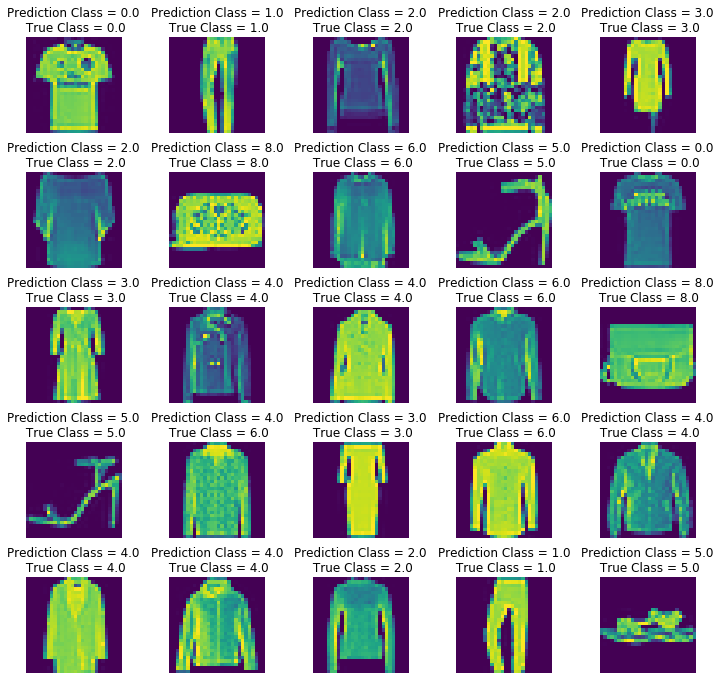

In [64]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

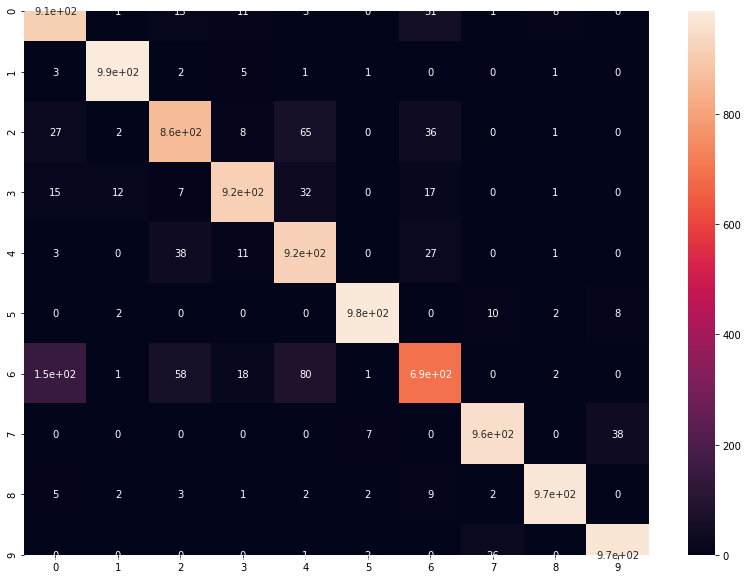

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [66]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.91      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.88      0.86      0.87      1000
     Class 3       0.94      0.92      0.93      1000
     Class 4       0.83      0.92      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.83      0.69      0.76      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
# 10 classes:
# 0 -> T-shirt/top 
# 1 -> Trouser 
# 2 -> Pullover 
# 3 -> Dress 
# 4 -> Coat 
# 5 -> Sandal 
# 6 -> Shirt 
# 7 -> Sneaker 
# 8 -> Bag 
# 9 -> Ankle boot